<img src="../Pics/MLSb-T.png" width="160">
<br><br>
<center><u><H1>Support Vector Machines for Classification</H1></u></center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score

In [2]:
df=pd.read_csv("../data/iris.csv")

In [3]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(["Iris-setosa", "Iris-versicolor", "Iris-virginica"])

LabelEncoder()

In [4]:
df['class']=le.transform(df['Species'].values)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['PetalLengthCm','PetalWidthCm']], df['class'], 
                                                    test_size=0.3, random_state= 0)

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [7]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [8]:
from sklearn.svm import SVC

In [9]:
svm = SVC(kernel='linear', C=1.0)

In [10]:
svm.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Cross-Validation:

In [11]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
y_pred = svm.predict(X_test_std)
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       1.00      0.94      0.97        18
          2       0.92      1.00      0.96        11

avg / total       0.98      0.98      0.98        45



In [12]:
print(accuracy_score(y_test,y_pred))

0.9777777777777777


In [13]:
print(pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted']))

Predicted   0   1   2
Actual               
0          16   0   0
1           0  17   1
2           0   0  11


In [14]:
print(confusion_matrix(y_test, y_pred))

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [15]:
#  accuracy of a linear kernel support vector machine by splitting the data,
# fitting a model and computing the score 5 consecutive times (with different splits each time)
scores = cross_val_score(svm, X_test_std, y_test, cv=5)
scores

array([1.        , 0.88888889, 0.88888889, 0.875     , 1.        ])

## Solving nonlinear models with kernel SVM:

In [16]:
svm = SVC(kernel='rbf', gamma=0.1,C=10.0)
svm.fit(X_train_std, y_train)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [17]:
import Plotting_Decision_Boundaries as pdb

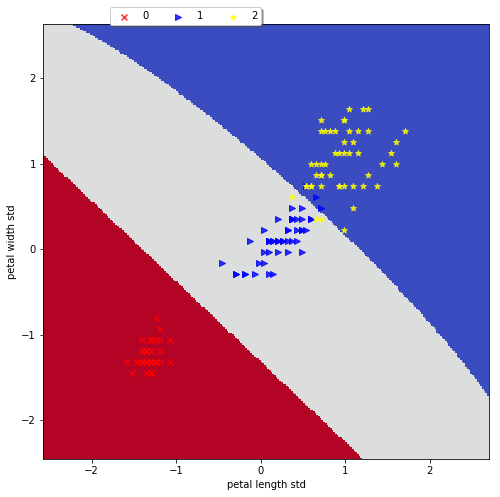

In [18]:
pdb.plot_regions(X=X_combined_std,y=y_combined,classifier=svm)

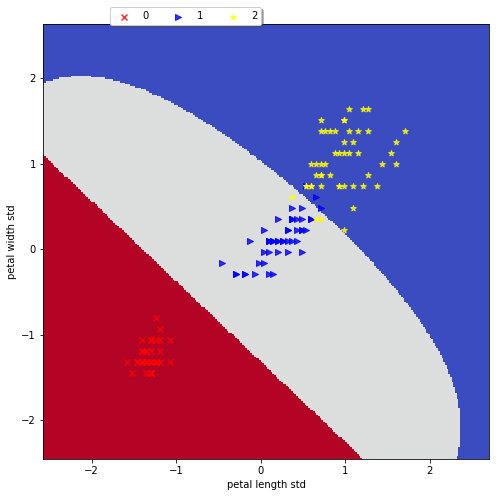

In [19]:
svm = SVC(kernel='rbf', gamma=0.2,C=10.0)
svm.fit(X_train_std, y_train)
pdb.plot_regions(X=X_combined_std,y=y_combined,classifier=svm)

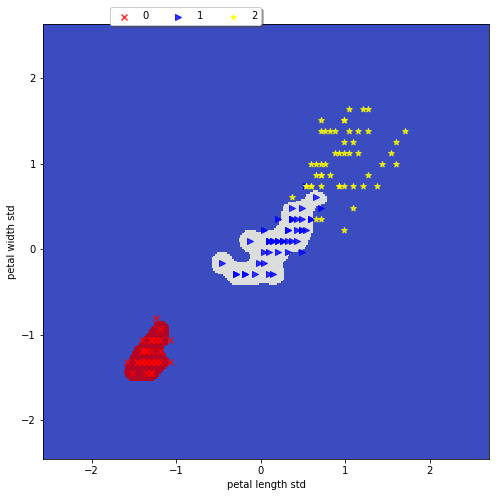

In [20]:
svm = SVC(kernel='rbf', gamma=100,C=10.0)
svm.fit(X_train_std, y_train)
pdb.plot_regions(X=X_combined_std,y=y_combined,classifier=svm)

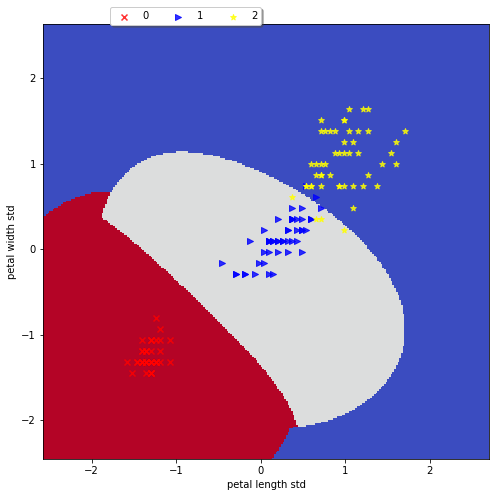

In [21]:
svm = SVC(kernel='rbf', gamma='auto',C=10.0)
svm.fit(X_train_std, y_train)
pdb.plot_regions(X=X_combined_std,y=y_combined,classifier=svm)

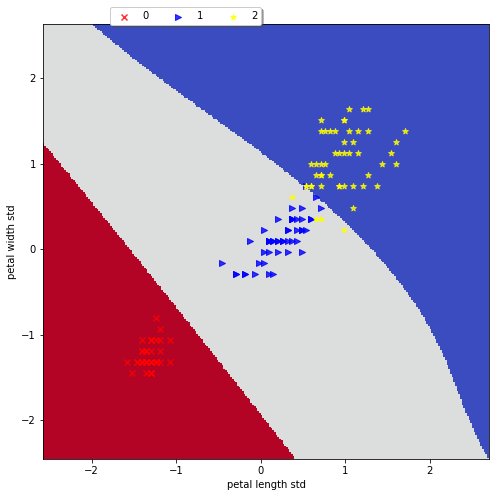

In [22]:
svm = SVC(kernel='poly', gamma='auto',C=10.0)
svm.fit(X_train_std, y_train)
pdb.plot_regions(X=X_combined_std,y=y_combined,classifier=svm)

## Reference: 
http://scikit-learn.org/stable/modules/svm.html